# Food Delivery Orders EDA
**Author:** Jessy Andújar Cruz

**Date:** 2025-05-27

## Introduction

### Project Description
This project aims to perform an exploratory data analysis (EDA) on a food delivery orders dataset. By investigating trends and patterns in customer orders, cuisine preferences, order costs, and delivery performance, the goal is to uncover actionable insights that could help food delivery platforms and restaurants improve their service and operations.

### Objective
The primary objectives of this analysis are:
- To clean and prepare the dataset for analysis by addressing missing values, data types, and outliers.
- To perform descriptive and visual analyses on order characteristics such as cuisine type, cost, preparation, and delivery times.
- To engineer new features that allow for deeper insights, such as identifying late deliveries and evaluating the relationship between food preparation and delivery times.
- To segment orders by cost and satisfaction, helping identify top-selling cuisines, high-value customers, and potential areas for operational improvement.

### Dataset Information
The dataset, obtained from [Kaggle: Food Ordering and Delivery App Dataset](https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset), contains 1,898 records of food delivery orders. Each record includes details such as:
- Order and customer IDs
- Restaurant name and cuisine type
- Cost of the order
- Day of the week for the order
- Customer rating
- Food preparation and delivery times

This analysis will provide a foundation for further data-driven strategies in the food delivery sector.

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import dataset

In [3]:
df = pd.read_csv('../data/raw/food_order.csv')

#### Data overview

In [4]:
df.sample(10) # display a random sample of 10 rows from the dataset

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
625,1478222,370656,Vanessa's Dumplings,Chinese,8.98,Weekend,Not given,20,20
272,1477314,52832,ilili Restaurant,Middle Eastern,9.46,Weekday,4,25,25
1080,1477272,143984,The Smile,American,12.27,Weekday,Not given,32,24
291,1477797,194778,Shake Shack,American,16.06,Weekend,5,30,17
748,1476807,79215,Blue Ribbon Sushi,Japanese,16.49,Weekend,3,24,30
1528,1478025,99312,Pylos,Mediterranean,14.02,Weekday,3,30,29
1712,1477356,354923,CafÌ© China,Chinese,15.57,Weekday,4,34,31
545,1477523,53503,RedFarm Broadway,Chinese,12.23,Weekend,4,21,21
309,1478221,47280,Rubirosa,Italian,12.56,Weekend,4,31,17
1160,1477441,275689,Blue Ribbon Sushi,Japanese,12.23,Weekend,Not given,20,24


In [5]:
df.info() # check data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [6]:
df.describe() # get summary statistics for numerical columns

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


## Data Cleaning

##### Check for duplicates: (e.g., duplicated order_id)


In [7]:
order_is_duplicate = df['order_id'].duplicated().sum() # check for duplicate order IDs
print(f"Number of duplicate order IDs: {order_is_duplicate}")

customer_is_duplicate = df['customer_id'].duplicated().sum() # check for duplicate customer IDs
print(f"Number of duplicate customer IDs: {customer_is_duplicate}")

Number of duplicate order IDs: 0
Number of duplicate customer IDs: 698


##### Standardize categorical values: e.g., ensure day_of_the_week has only “Weekend”/“Weekday” (no typos or variations).

In [8]:
print('Orders by day of the week:')
df['day_of_the_week'].value_counts(dropna=False) # count the number of orders for each day of the week


Orders by day of the week:


day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

##### Ensure all costs are positive.

In [9]:
print('Count of pos vs neg values:')
pos = (df['cost_of_the_order'] >= 0).sum()
neg = (df['cost_of_the_order'] < 0).sum()
print(f"Non-negative values: {pos}")
print(f"Negative values: {neg}")

Count of pos vs neg values:
Non-negative values: 1898
Negative values: 0


##### Make sure food prep and delivery times are non-negative.

In [10]:
print('Food preparation time values are non-negative:')
food_prep_pos = df['food_preparation_time'] >= 0
food_prep_neg = df['food_preparation_time'] < 0
print('Non-negative values:', food_prep_pos.sum())
print('Negative values:', food_prep_neg.sum())

print('\nDelivery Time values are non-negative:')
delivery_time_pos = df['delivery_time'] >= 0
delivery_time_neg = df['delivery_time'] < 0
print(f'Non-negative values: {delivery_time_pos.sum()}')
print(f'Negative values: {delivery_time_neg.sum()}')

Food preparation time values are non-negative:
Non-negative values: 1898
Negative values: 0

Delivery Time values are non-negative:
Non-negative values: 1898
Negative values: 0


#####  Change rating column to type int16 and use NaN for 'not given' rating.

In [11]:
df['rating'] = df['rating'].replace('Not given', np.nan)  # Replace 'Not given' with NaN
df['rating'] = df['rating'].astype('float').astype('Int16')  # Convert rating to nullable integer type
print('Rating values after conversion:')
df['rating'].value_counts(dropna=False) # Display counts of ratings including NaN values

Rating values after conversion:


rating
<NA>    736
5       588
4       386
3       188
Name: count, dtype: Int64

## Feature Engineering

##### Add an order_total_time column

In [12]:
df['order_total_time'] = df['food_preparation_time'] + df['delivery_time']
df[['order_id', 'order_total_time']].sample(10)  # Display a random sample of 10 rows from the new column


,order_id,order_total_time
1147,1477432,52
647,1477542,54
1231,1477001,49
1840,1476843,54
1865,1476661,47
386,1476623,48
382,1478088,59
281,1476551,49
1567,1478419,51
1099,1477780,47


##### Add a food_preparation_time_mean column to help the restaurant improve food preparation times

In [13]:
df['food_preparation_time_mean'] = df.groupby('restaurant_name')['food_preparation_time'].transform('mean')
df[['restaurant_name', 'food_preparation_time', 'food_preparation_time_mean']].sample(10)  # Display a random sample of 10 rows with the new column


,restaurant_name,food_preparation_time,food_preparation_time_mean
1641,The Meatball Shop,31,27.181818
647,Shake Shack,27,27.945205
274,Blue Ribbon Brooklyn,23,27.250000
109,Blue Ribbon Sushi,34,27.924370
1114,TAO,24,26.775510
82,Shake Shack,35,27.945205
1659,Sushi of Gari 46,21,27.540541
218,Han Dynasty,33,27.413043
634,Shake Shack,28,27.945205
812,Blue Ribbon Sushi Izakaya,33,28.724138


In [14]:
df[df['restaurant_name'] == 'Sushi of Gari 46'][['restaurant_name', 'food_preparation_time', 'food_preparation_time_mean']].head() # Display rows for a specific restaurant to check the food preparation time against the mean

,restaurant_name,food_preparation_time,food_preparation_time_mean
29,Sushi of Gari 46,20,27.540541
56,Sushi of Gari 46,24,27.540541
159,Sushi of Gari 46,31,27.540541
226,Sushi of Gari 46,35,27.540541
237,Sushi of Gari 46,24,27.540541


##### Based on the new added column 'food_preparation_time_mean' create a column to check if food is late.

In [15]:
df['food_is_late'] = df['food_preparation_time'] > df['food_preparation_time_mean']
df[['restaurant_name', 'food_preparation_time', 'food_preparation_time_mean', 'food_is_late']].sample(10)  # Display a random sample of 10 rows with the new column

,restaurant_name,food_preparation_time,food_preparation_time_mean,food_is_late
433,The Kati Roll Company,33,27.375000,True
77,The Kati Roll Company,20,27.375000,False
867,Shake Shack,23,27.945205,False
410,S'MAC,34,29.416667,True
547,Burger Joint,22,27.500000,False
932,Blue Ribbon Sushi,26,27.924370,False
1647,Five Guys Burgers and Fries,22,25.620690,False
1242,RedFarm Broadway,34,27.593220,True
719,Blue Ribbon Sushi,33,27.924370,True
187,Chipotle Mexican Grill $1.99 Delivery,27,26.000000,True


##### Add an order_total_time_mean column

In [16]:
df['order_total_time_mean'] = df.groupby('restaurant_name')['order_total_time'].transform('mean')
df[['restaurant_name', 'order_total_time', 'order_total_time_mean']].sample(10)  # Display a random sample of 10 rows with the new column


,restaurant_name,order_total_time,order_total_time_mean
449,Saravanaa Bhavan,56,56.200000
816,ilili Restaurant,55,51.277778
1133,Benihana,54,48.200000
556,ilili Restaurant,36,51.277778
227,Blue Ribbon Sushi Bar & Grill,60,49.704545
508,Shake Shack,38,52.607306
147,Shake Shack,53,52.607306
76,Benihana,38,48.200000
137,CafÌ© China,54,50.166667
1673,Coppola's East,48,48.000000


In [17]:
df[df['restaurant_name'] == 'Sushi of Gari 46'][['restaurant_name', 'order_total_time', 'order_total_time_mean']].head() # Display rows for a specific restaurant to check the total order time against the mean

,restaurant_name,order_total_time,order_total_time_mean
29,Sushi of Gari 46,49,53.513514
56,Sushi of Gari 46,48,53.513514
159,Sushi of Gari 46,64,53.513514
226,Sushi of Gari 46,58,53.513514
237,Sushi of Gari 46,44,53.513514


##### Based on column 'order_total_time' create a column to check if order is late

In [18]:
df['order_is_late'] = df['order_total_time'] > df['order_total_time_mean']
df[['restaurant_name', 'order_total_time', 'order_total_time_mean', 'order_is_late']].sample(10)  # Display a random sample of 10 rows with the new column

,restaurant_name,order_total_time,order_total_time_mean,order_is_late
1799,Blue Ribbon Sushi,50,51.865546,False
1748,The Meatball Shop,46,51.424242,False
113,Parm,50,52.808824,False
1274,Room Service,51,48.333333,True
545,RedFarm Broadway,42,50.745763,False
642,Cafeteria,51,53.333333,False
1581,Boqueria,58,53.444444,True
1637,Shake Shack,53,52.607306,True
1517,Paul & Jimmy's,48,48.000000,False
838,RedFarm Hudson,59,51.363636,True


##### Create a column if the delivery was good or not based on the client rating (4-5 is good)

In [19]:
df['order_is_good'] = df['rating'].apply(lambda x: True if x >= 4 else False if pd.notna(x) else np.nan)  # Create a new column based on the rating
df[['restaurant_name', 'rating', 'order_is_good']].sample(10)  # Display a random sample of 10 rows with the new column

,restaurant_name,rating,order_is_good
817,Shake Shack,4,True
811,The Smile,5,True
1428,Blue Ribbon Sushi,4,True
618,Ravagh Persian Grill,<NA>,NaN
1012,Melt Shop,3,False
1075,Blue Ribbon Fried Chicken,4,True
1094,Ravagh Persian Grill,5,True
1104,Shake Shack,4,True
1481,The Meatball Shop,5,True
242,Blue Ribbon Sushi,<NA>,NaN


##### Based on the Q1 and Q3 percentile by cuisine type add a column if the cost_of_the_order is expensive, normal or cheap

In [20]:
# Calculate Q1, Q3, and IQR for each cuisine type
Q1 = df.groupby('cuisine_type')['cost_of_the_order'].quantile(0.25)
Q3 = df.groupby('cuisine_type')['cost_of_the_order'].quantile(0.75)
IQR = Q3 - Q1

# Merge quantiles and IQR back to the original dataframe
df['Q1'] = df['cuisine_type'].map(Q1)
df['Q3'] = df['cuisine_type'].map(Q3)
df['IQR'] = df['cuisine_type'].map(IQR)

# Calculate the lower and upper bounds for outliers based on IQR
df['outliers_lower_bound'] = df['Q1'] - 1.5 * df['IQR']
df['outliers_upper_bound'] = df['Q3'] + 1.5 * df['IQR']

# Categorize the cost_of_the_order based on Q1 and Q3 values
df['cost_category'] = df.apply(lambda row: 'Expensive' if row['cost_of_the_order'] > row['outliers_upper_bound'] else 'Normal' if row['cost_of_the_order'] > row['outliers_lower_bound'] else 'Cheap', axis=1)

# Drop the Q1, Q3, and IQR columns as they are no longer needed
df = df.drop(columns=['Q1', 'Q3', 'IQR', 'outliers_lower_bound', 'outliers_upper_bound'])

# View the result
df[['cuisine_type', 'cost_of_the_order', 'cost_category']].head()


,cuisine_type,cost_of_the_order,cost_category
0,Korean,30.75,Expensive
1,Japanese,12.08,Normal
2,Mexican,12.23,Normal
3,American,29.20,Normal
4,American,11.59,Normal


In [21]:
df[df['cuisine_type'] == 'American'][['cuisine_type', 'cost_of_the_order', 'cost_category']].head() # Display rows for a specific cuisine type to check the cost category

,cuisine_type,cost_of_the_order,cost_category
3,American,29.20,Normal
4,American,11.59,Normal
12,American,24.30,Normal
14,American,12.13,Normal
15,American,16.20,Normal


In [22]:
df['cost_category'].value_counts(dropna=False)  # Count the number of orders in each cost category

cost_category
Normal       1887
Expensive       8
Cheap           3
Name: count, dtype: int64

In [23]:
df[df['cost_category'] == 'Expensive'][['cuisine_type', 'cost_of_the_order', 'cost_category']] # Display rows for expensive orders based on cuisine type and cost


,cuisine_type,cost_of_the_order,cost_category
0,Korean,30.75,Expensive
524,Mediterranean,32.93,Expensive
573,Mediterranean,35.41,Expensive
653,Korean,29.25,Expensive
746,Vietnamese,22.26,Expensive
858,Mediterranean,29.05,Expensive
1132,Mediterranean,31.43,Expensive
1148,Mediterranean,31.38,Expensive


In [24]:
df[df['cost_category'] == 'Cheap'][['cuisine_type', 'cost_of_the_order', 'cost_category']] # Display rows for cheap orders based on cuisine type and cost

,cuisine_type,cost_of_the_order,cost_category
301,Korean,8.25,Cheap
464,Korean,6.74,Cheap
1550,Korean,5.77,Cheap


##### Customer-level features: e.g., number of orders per customer (loyalty), average spend.

In [25]:
# Create a customer-level DataFrame
customer_features = df.groupby('customer_id').agg(
    customer_number_of_orders=('order_id', 'count'),
    customer_avg_spend=('cost_of_the_order', 'mean'),
    avg_rating=('rating', 'mean'),
    favorite_cuisine=('cuisine_type', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    favorite_restaurant=('restaurant_name', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    avg_order_total_time=('order_total_time', 'mean'),
    avg_cost_category=('cost_category', lambda x: x.mode()[0] if not x.mode().empty else np.nan)
).reset_index()

customer_features.index = np.arange(1, len(customer_features) + 1)  # Reset the index to start from 1
customer_features['customer_avg_spend'] = round(customer_features['customer_avg_spend'], 2)  # Round average spend to 2 decimal places
customer_features['avg_order_total_time'] = round(customer_features['avg_order_total_time'], 2)  # Round average order total time to 2 decimal places
customer_features['avg_rating'] = round(customer_features['avg_rating'], 2)  # Round average rating to 2 decimal places

customer_features.head() # Display the first few rows of the customer features DataFrame

,customer_id,customer_number_of_orders,customer_avg_spend,avg_rating,favorite_cuisine,favorite_restaurant,avg_order_total_time,avg_cost_category
1,1311,1,16.10,<NA>,Mexican,Chipotle Mexican Grill $1.99 Delivery,48.0,Normal
2,5139,1,22.26,5.0,Japanese,Sushi of Gari 46,50.0,Normal
3,5444,1,20.18,3.0,Japanese,Go! Go! Curry!,51.0,Normal
4,5693,1,8.30,<NA>,Italian,The Meatball Shop,61.0,Normal
5,6987,2,21.01,4.0,Southern,Hill Country Fried Chicken,58.5,Normal


##### Restaurant-level features: e.g., total orders, average rating.

In [26]:
# Classify restaurants based on their average rating
def classify_restaurant(rating):
    if pd.isna(rating):
        return 'No Rating'
    elif rating >= 4.5:
        return 'Excellent'
    elif rating >= 4.0:
        return 'Good'
    elif rating >= 3.0:
        return 'Average'
    else:
        return 'Poor'

# Create a restaurant-level DataFrame
restaurant_features = df.groupby('restaurant_name').agg(
    number_of_orders=('order_id', 'count'),
    cuisine=('cuisine_type', 'first'),
    rating=('rating', 'mean'),
    food_prep_time_avg=('food_preparation_time', 'mean'),
    order_time_avg=('order_total_time', 'mean'),
    money_spent=('cost_of_the_order', 'sum'),
)

restaurant_features['category'] = restaurant_features['rating'].apply(classify_restaurant)  # Classify restaurants based on their average rating
restaurant_features = restaurant_features.reset_index()  # Reset the index to make 'restaurant_name' a column

# Round columns to 2 decimal values
restaurant_features['money_spent'] = round(restaurant_features['money_spent'], 2)
restaurant_features['rating'] = round(restaurant_features['rating'], 2)
restaurant_features['food_prep_time_avg'] = round(restaurant_features['food_prep_time_avg'], 2)
restaurant_features['order_time_avg'] = round(restaurant_features['order_time_avg'], 2)

restaurant_features.head()  # Display the first few rows of the restaurant features DataFrame

,restaurant_name,number_of_orders,cuisine,rating,food_prep_time_avg,order_time_avg,money_spent,category
0,'wichcraft,1,American,5.0,28.0,56.00,8.10,Excellent
1,12 Chairs,4,Middle Eastern,4.5,27.0,54.75,88.57,Excellent
2,5 Napkin Burger,5,American,4.0,30.2,54.60,79.84,Good
3,67 Burger,1,American,5.0,20.0,48.00,29.05,Excellent
4,Alidoro,1,American,<NA>,34.0,56.00,12.61,No Rating


## Exploratory Data Analysis (EDA)

In [27]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,order_total_time,food_preparation_time_mean,food_is_late,order_total_time_mean,order_is_late,order_is_good,cost_category
0,1477147,337525,Hangawi,Korean,30.75,Weekend,<NA>,25,20,45,23.000000,True,44.000000,True,NaN,Expensive
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,<NA>,25,23,48,28.724138,False,52.206897,False,NaN,Normal
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,26.750000,False,52.312500,False,True,Normal
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,27.197917,False,51.343750,False,False,Normal
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49,23.250000,True,48.000000,True,True,Normal


##### Getting the most popular cuisine and restaurant based on the customer-level features new DataFrame

In [28]:
most_popular_cuisine = customer_features['favorite_cuisine'].mode()  # Get the most common favorite cuisine across all customers
most_popular_restaurant = customer_features['favorite_restaurant'].mode()  # Get the most common favorite restaurant across all customers
print(f"Most popular cuisine: {most_popular_cuisine[0]}")
print(f"Most popular restaurant: {most_popular_restaurant[0]}")

Most popular cuisine: American
Most popular restaurant: Shake Shack


##### Filtering by cuisine, category and number of orders to get the most popular restaurants using the new restaurant-level features DataFrame

In [29]:
restaurant_features[(restaurant_features['cuisine'] == 'Japanese') & (restaurant_features['category'] == 'Excellent') & (restaurant_features['number_of_orders'] >= 10)]

,restaurant_name,number_of_orders,cuisine,rating,food_prep_time_avg,order_time_avg,money_spent,category
22,Blue Ribbon Sushi Bar & Grill,44,Japanese,4.59,26.30,49.70,666.62,Excellent
141,Sushi Samba,11,Japanese,4.88,29.09,53.73,186.59,Excellent
142,Sushi of Gari,16,Japanese,4.71,28.19,50.12,291.18,Excellent
144,Sushi of Gari Tribeca,24,Japanese,4.62,28.12,51.88,375.79,Excellent
172,Yama Japanese Restaurant,18,Japanese,4.5,26.94,51.00,256.59,Excellent


##### Display the restaurant with the highest total money spent

In [30]:
restaurant_features[restaurant_features['money_spent'] == restaurant_features['money_spent'].max()] # Display the restaurant with the highest total money spent

,restaurant_name,number_of_orders,cuisine,rating,food_prep_time_avg,order_time_avg,money_spent,category
136,Shake Shack,219,American,4.28,27.95,52.61,3579.53,Good


##### Check for outliers: in numerical columns (prep time, delivery time, cost)

Number of outliers detected using IQR method: 0


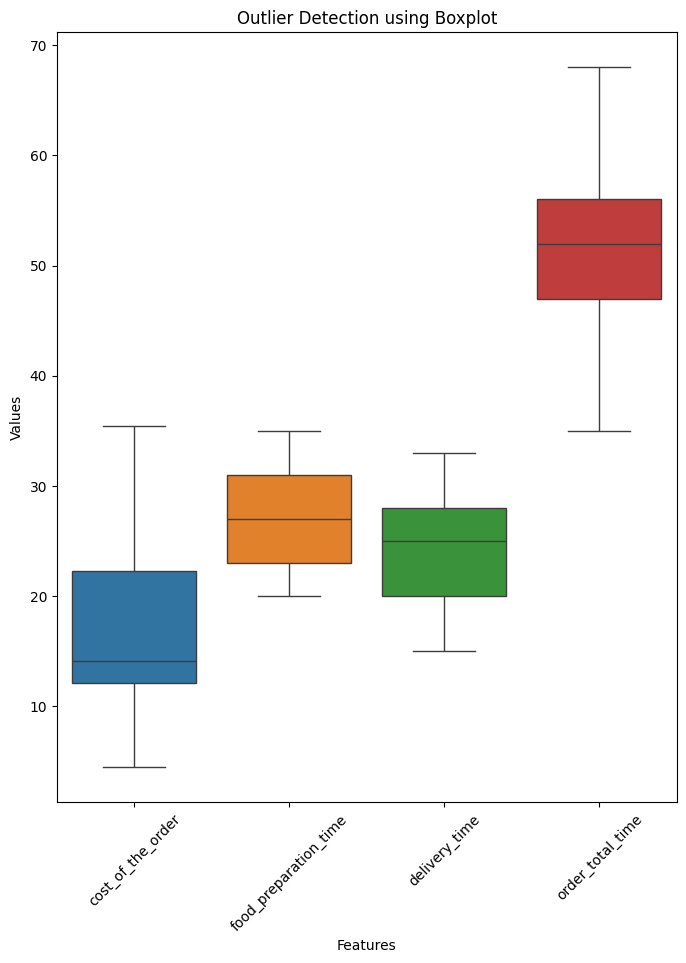

In [52]:
df_numeric = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'order_total_time']]
Q1 = df_numeric.quantile(0.25) # Calculate the first quartile for each numeric column
Q3 = df_numeric.quantile(0.75) # Calculate the third quartile for each numeric column
IQR = Q3 - Q1
outliers_iqr = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))

outliers = outliers_iqr.any(axis=1)
print(f"Number of outliers detected using IQR method: {outliers.sum()}")

plt.figure(figsize=(8, 10))
sns.boxplot(data=df_numeric, orient='v')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Outlier Detection using Boxplot')
plt.savefig('../reports/figures/outlier_detection_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()

##### Check for customer features outliers: in numerical columns (customer_number_of_orders, customer_avg_spend, avg_order_total_time)

Number of outliers detected using IQR method: 67


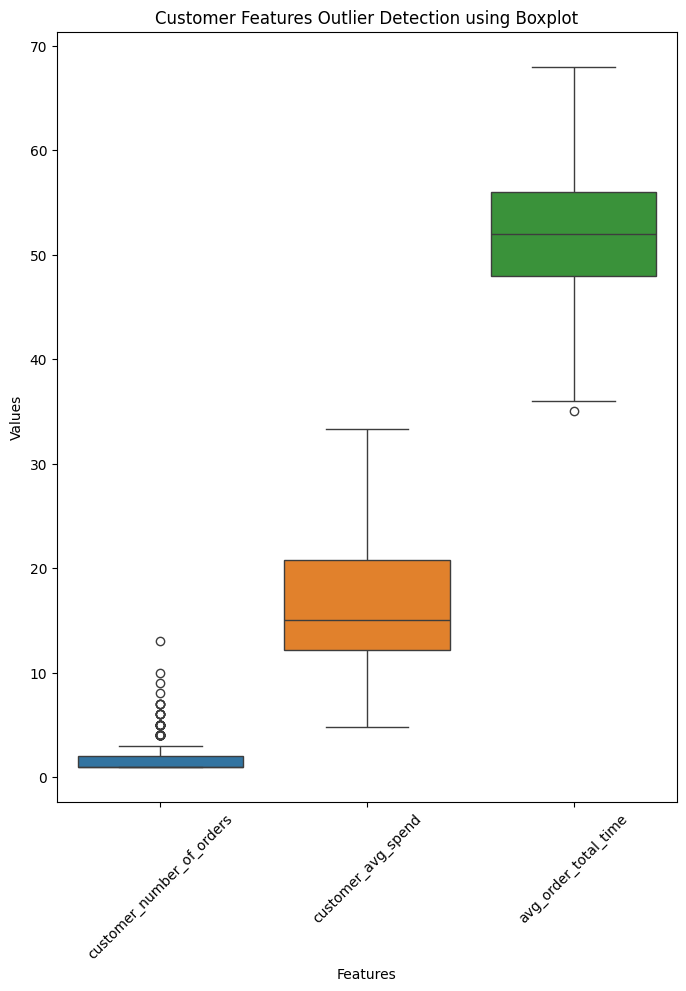

In [59]:
customer_features_numeric = customer_features[['customer_number_of_orders', 'customer_avg_spend', 'avg_order_total_time']]
customer_Q1 = customer_features_numeric.quantile(0.25) # Calculate the first quartile for each numeric column
customer_Q3 = customer_features_numeric.quantile(0.75) # Calculate the third quartile for each numeric column
customer_IQR = customer_Q3 - customer_Q1
customer_outliers_iqr = (customer_features_numeric < (customer_Q1 - 1.5 * customer_IQR)) | (customer_features_numeric > (customer_Q3 + 1.5 * customer_IQR))

customer_outliers = customer_outliers_iqr.any(axis=1)
print(f"Number of outliers detected using IQR method: {customer_outliers.sum()}")

plt.figure(figsize=(8, 10))
sns.boxplot(data=customer_features_numeric, orient='v')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Customer Features Outlier Detection using Boxplot')
plt.savefig('../reports/figures/customer_outlier_detection_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()

##### Check for restaurant features outliers: in numerical columns (number_of_orders, food_prep_time_avg, order_time_avg, money_spent)

Number of outliers detected using IQR method: 23


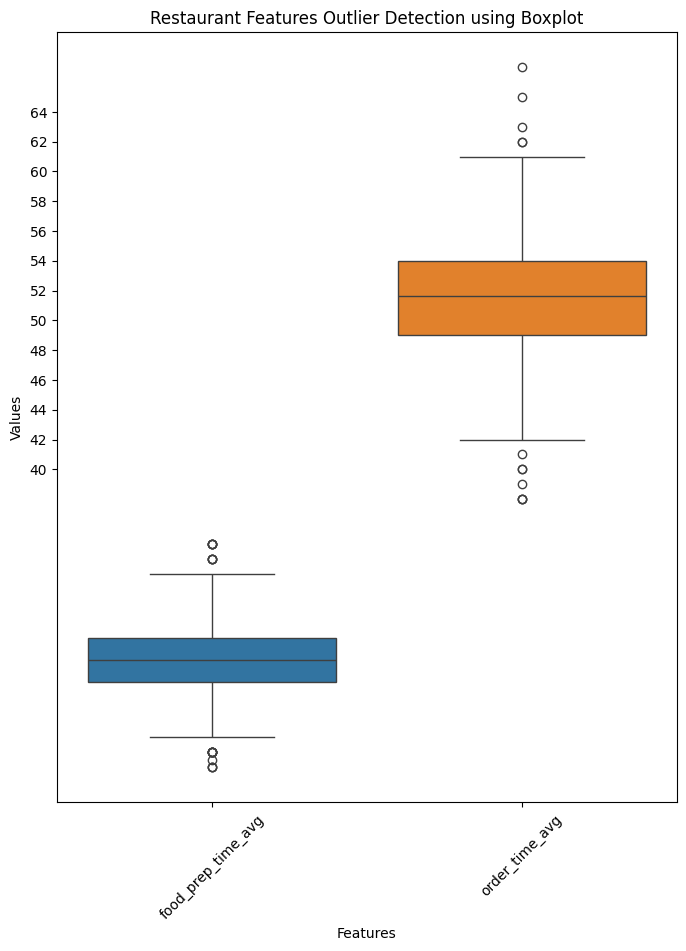

In [ ]:
restaurant_features_numeric = restaurant_features[['food_prep_time_avg', 'order_time_avg']]
restaurant_Q1 = restaurant_features_numeric.quantile(0.25) # Calculate the first quartile for each numeric column
restaurant_Q3 = restaurant_features_numeric.quantile(0.75) # Calculate the third quartile for each numeric column
restaurant_IQR = restaurant_Q3 - restaurant_Q1
restaurant_outliers_iqr = (restaurant_features_numeric < (restaurant_Q1 - 1.5 * restaurant_IQR)) | (restaurant_features_numeric > (restaurant_Q3 + 1.5 * restaurant_IQR))

restaurant_outliers = restaurant_outliers_iqr.any(axis=1)
print(f"Number of outliers detected using IQR method: {restaurant_outliers.sum()}")

plt.figure(figsize=(8, 10))
sns.boxplot(data=restaurant_features_numeric, orient='v')
plt.xticks(rotation=45)
plt.yticks(np.arange(20, 65, 2))  # Example: set y-axis ticks from 40 to 64 with step 2
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Restaurant Features Outlier Detection using Boxplot')
plt.savefig('../reports/figures/restaurant_outlier_detection_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()